- https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB
-  

In [28]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


import pandas as pd
import numpy as np

from ML_loader import DatasetLoader,ModelLoader


In [31]:
#Get data 
loader = DatasetLoader()
loader.read_dataset('partial_database.csv',class_path='labelsDefault.txt',separator=',')
loader.split_dataset()

#Normalize data, if not already normalized
print(np.shape(loader.X_train),np.shape(loader.X_test),np.shape(loader.y_train),np.shape(loader.y_test))

(4048, 17) (1012, 17) (4048,) (1012,)


In [32]:
#Get model
model = ModelLoader()
model.set_model(MultinomialNB())

cv = RepeatedStratifiedKFold(n_splits=22, n_repeats=3, random_state=1)

#Optimization 
param = {'alpha': np.linspace(0.5, 1.5, 6),
            'fit_prior': [True, False]}

model.set_optimal_params(param)

model.optimize(loader.X_train,loader.y_train,cv=cv,scoring='accuracy',n_iter=10)

#Train model with optimal params
model.set_model(MultinomialNB(**model.optimal_params))


Score accuracy group:  0.8291925465838509
Score accuracy global:  0.2756916996047431
Memory:  308.796875 MB
Score accuracy group:  0.9565217391304348
Score accuracy global:  0.34881422924901184
Memory:  312.375 MB
Score accuracy group:  0.5869565217391305
Score accuracy global:  0.42193675889328064
Memory:  317.18359375 MB
Score accuracy group:  0.5144927536231884
Score accuracy global:  0.46936758893280633
Memory:  322.8828125 MB
Score accuracy group:  0.717391304347826
Score accuracy global:  0.5177865612648221
Memory:  304.75 MB
Score accuracy group:  0.6086956521739131
Score accuracy global:  0.549407114624506
Memory:  305.71875 MB
Score accuracy group:  0.30434782608695654
Score accuracy global:  0.5642292490118577
Memory:  306.87890625 MB
Average memory usage:  311.2265625 MB


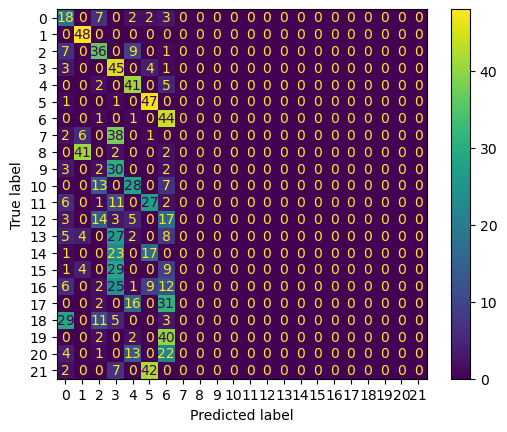

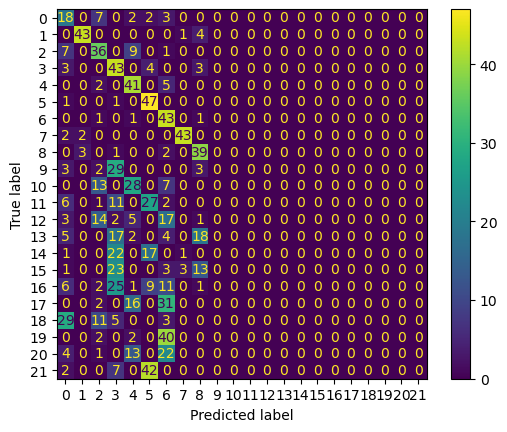

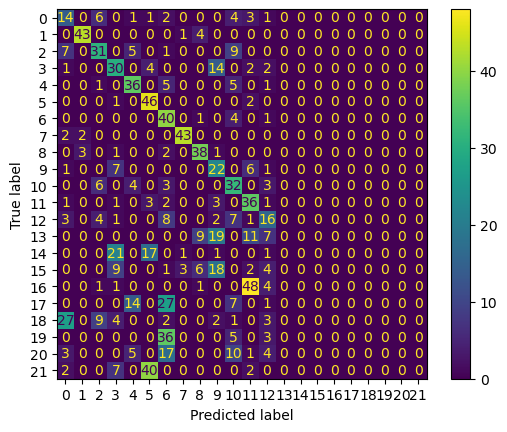

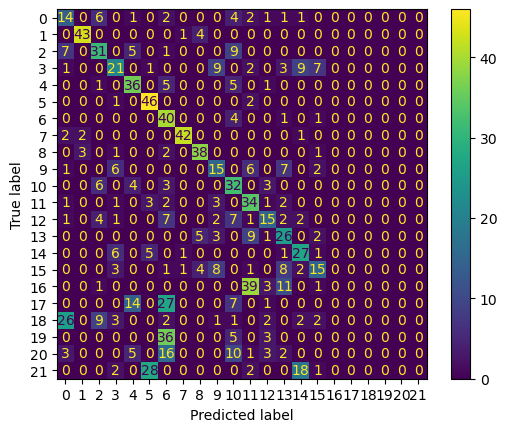

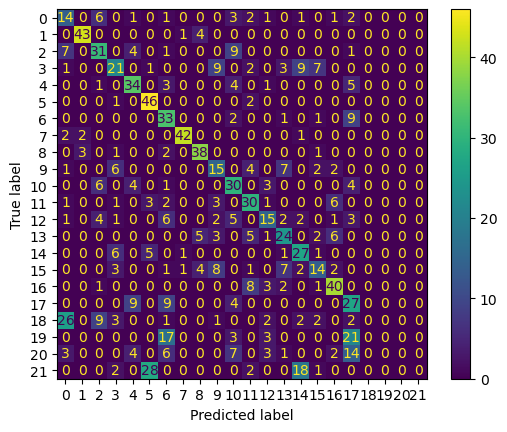

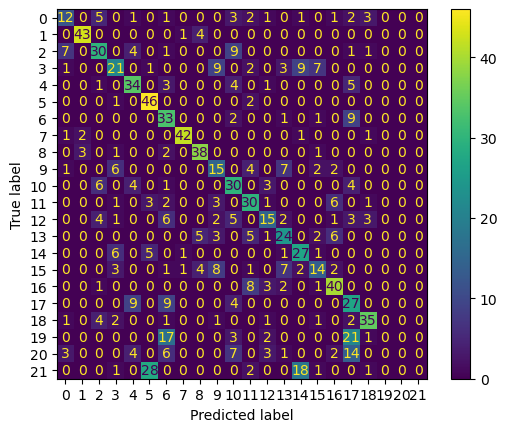

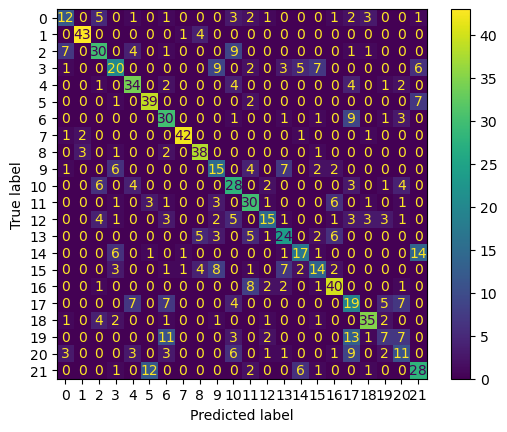

In [33]:
##Split by class, to increment by class:
class_to_group = {1:[1,2,3,4,5,6,7],2:[8,9],3:[10,11,12,13],4:[14,15,16],5:[17,18],6:[19],7:[20,21,22]}
X_train_merged, X_test_merged, y_train_merged, y_test_merged=loader.split_dataset_class(class_to_group)
memory_values = []

#Train model
for X_train,y_train,X_test,y_test in (zip(X_train_merged,y_train_merged,X_test_merged,y_test_merged)):
    mem,res=model.partial_fit_train(X_train,y_train,classes=loader.classes)
    
    print("Score accuracy group: ",model.score(X_test,y_test))
    print("Score accuracy global: ",model.score(loader.X_test,loader.y_test))
    print("Memory: ",np.mean(mem),"MB")
    memory_values.append(np.mean(mem))
    
    y_pred=model.predict(loader.X_test)
    cm = confusion_matrix(loader.y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()

model.reset_model()

average_memory = np.mean(memory_values)
print("Average memory usage: ", average_memory,"MB")

Score accuracy batch:  0.6027667984189723
Score accuracy global:  0.5701581027667985
Memory:  316.546875 MB
Score accuracy batch:  0.658102766798419
Score accuracy global:  0.5681818181818182
Memory:  318.2890625 MB
Score accuracy batch:  0.6264822134387352
Score accuracy global:  0.5701581027667985
Memory:  319.57421875 MB
Score accuracy batch:  0.5731225296442688
Score accuracy global:  0.5711462450592886
Memory:  320.7890625 MB
Score accuracy batch:  0.5652173913043478
Score accuracy global:  0.5701581027667985
Memory:  309.40234375 MB
Score accuracy batch:  0.5039525691699605
Score accuracy global:  0.5681818181818182
Memory:  310.21875 MB
Score accuracy batch:  0.5118577075098815
Score accuracy global:  0.5642292490118577
Memory:  311.25 MB
Score accuracy batch:  0.46047430830039526
Score accuracy global:  0.5642292490118577
Memory:  312.10546875 MB
Score accuracy batch:  0.4624505928853755
Score accuracy global:  0.5642292490118577
Memory:  312.78515625 MB
Score accuracy batch:  

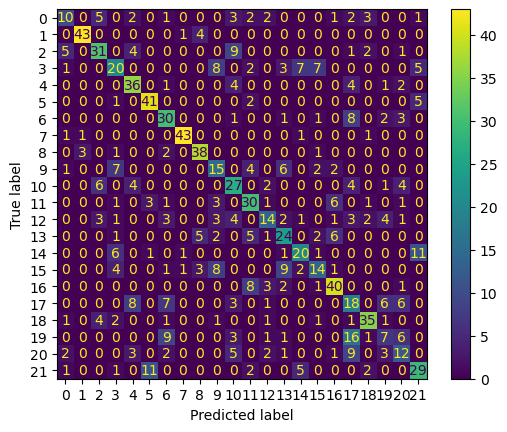

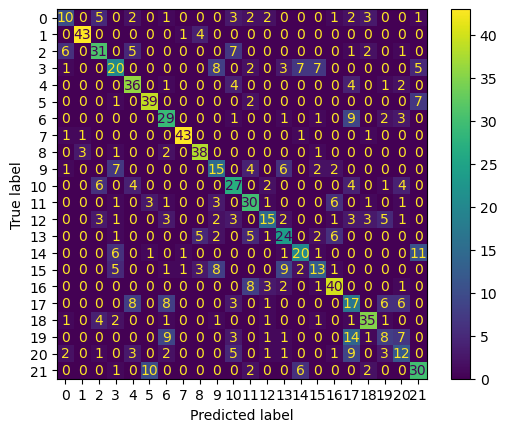

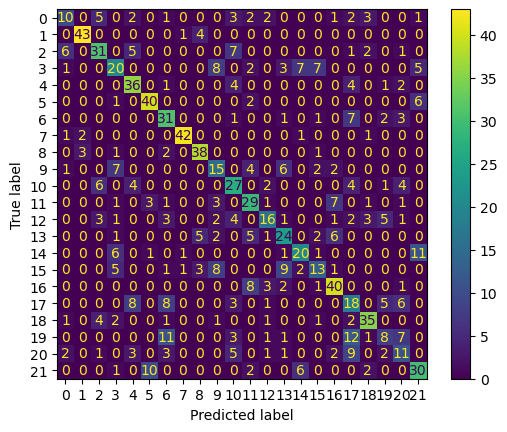

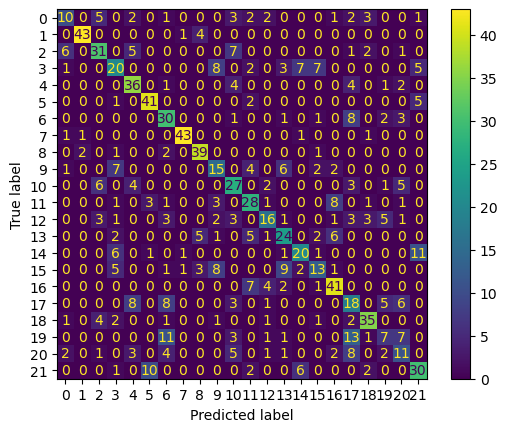

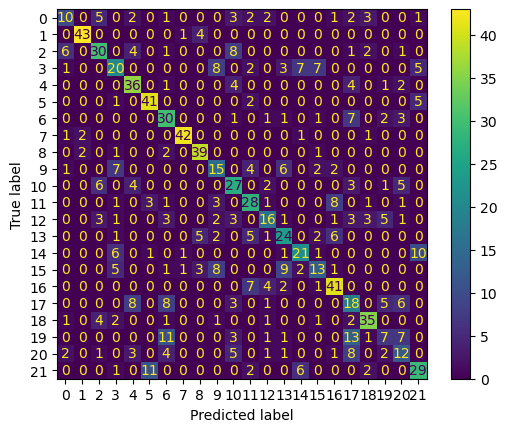

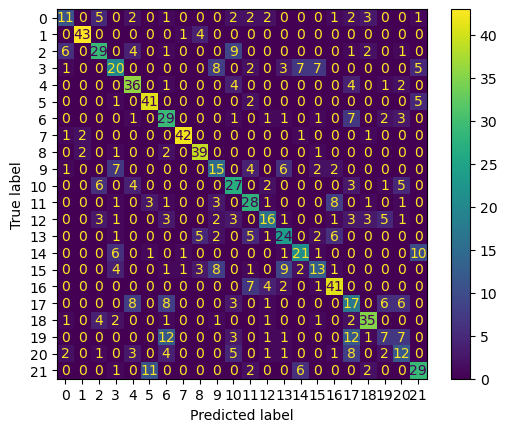

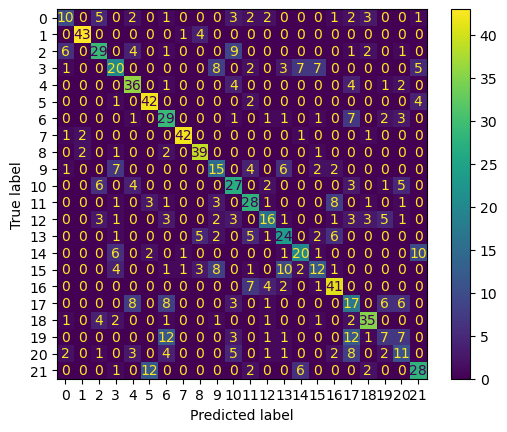

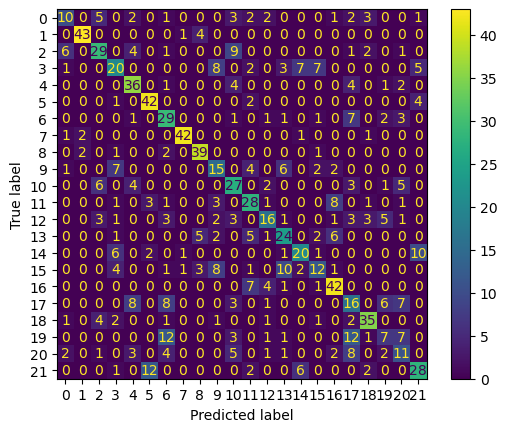

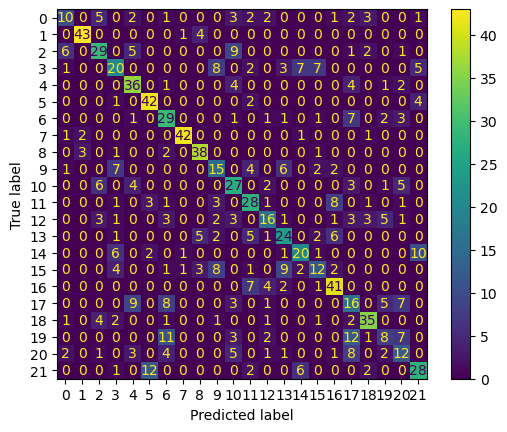

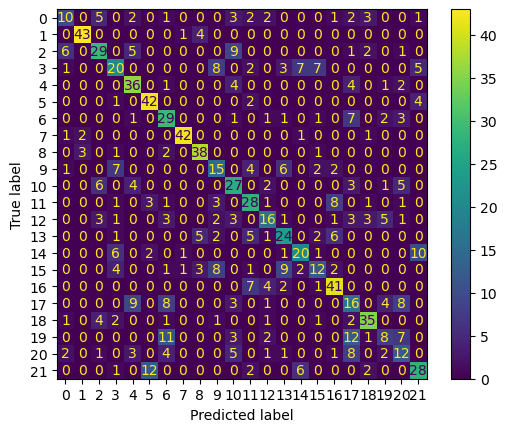

In [34]:
X_train_split_data,y_train_split_data,X_test_split_data,y_test_split_data=loader.split_dataset_data(10)
memory_values = []

for x in range(len(X_train_split_data)):
    mem,res=model.partial_fit_train(X_train_split_data[x],y_train_split_data[x],classes=loader.classes)
    print("Score accuracy batch: ",model.score(X_test_split_data[x],y_test_split_data[x]))
    print("Score accuracy global: ",model.score(loader.X_test,loader.y_test))
    print("Memory: ",np.mean(mem),"MB")
    memory_values.append(np.mean(mem))

    y_pred=model.predict(loader.X_test)
    cm = confusion_matrix(loader.y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()

model.reset_model()

average_memory = np.mean(memory_values)
print("Average memory usage: ", average_memory,"MB")